<a href="https://colab.research.google.com/github/agmarrugo/computer-vision-utb/blob/main/notebooks/template_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Template matching

Andres Marrugo, PhD    
Universidad Tecnológica de Bolívar

In this activity we will go through different approaches for matching a template in an image.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from skimage.filters import threshold_otsu
import skimage
from scipy import signal
from scipy import misc

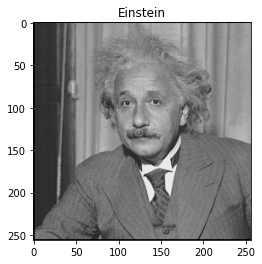

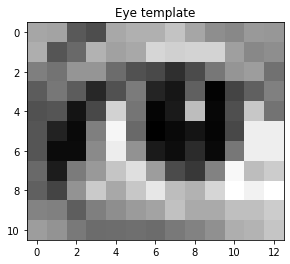

In [3]:
IMAGE_URL = 'https://github.com/agmarrugo/computer-vision-utb/blob/main/data/einstein.jpg?raw=true'

image = io.imread(IMAGE_URL)

# convert the image to float to avoid overflow in uint8 arithmetic.
image = skimage.img_as_float(image)*255

# Display image
plt.imshow(image, cmap='gray')
plt.title("Einstein")
plt.show()

# Extract template
width = 13
height = 11
template = image[90 : 90 + height, 103 : 103 + width]

# Display template
plt.imshow(template, cmap='gray')
plt.title("Eye template")
plt.show()

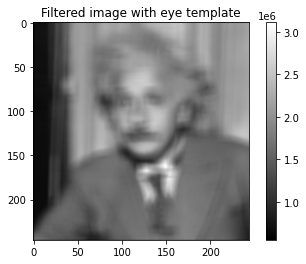

In [4]:
# Let's filter the image with the template

# We will use the function correlate2d because we do not want the template
# to be flipped 
image_filtered = signal.correlate2d(image, template, boundary='symm', mode='valid')

# Display image
plt.imshow(image_filtered,  cmap='gray')
plt.title('Filtered image with eye template')
plt.colorbar()
plt.show()


What problem is there with filtering directly with the image template?

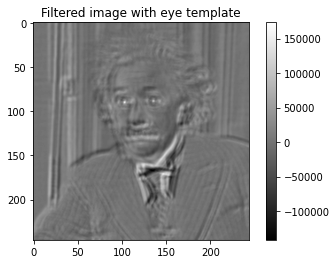

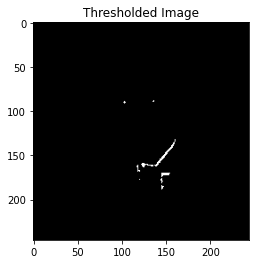

In [7]:
# By removing the mean from the template the result improves
# however, it is not entirely reliable

template_m = template - template.mean()

image_filtered = signal.correlate2d(image - image.mean(), template_m, boundary='symm', mode='valid')

plt.imshow(image_filtered,  cmap='gray')
plt.title('Filtered image with eye template')
plt.colorbar()
plt.show()

# We threshold the filtered image
binary = image_filtered > image_filtered.max() * 0.5

plt.imshow(binary,  cmap='gray')
plt.title('Thresholded Image')
plt.show()

Problems?

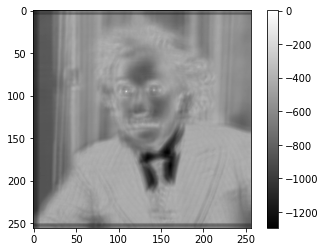

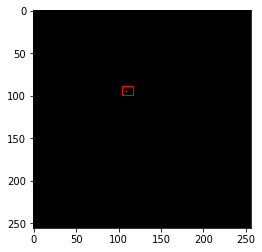

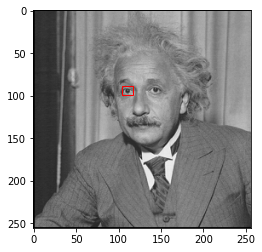

In [8]:
# The sum squared of differences can be implemented by linear filtering

def ssd_filter(f, g):
# g = template
# f = image
  h1 = np.sum(g[:]**2) * np.ones(np.shape(f))

  h2 = -2 * signal.correlate2d(f, g, boundary='symm', mode='same')

  h3 = signal.convolve2d(f**2, np.ones(np.shape(g)), boundary='symm', mode='same')
  
  h = h1 + h2 + h3
  
  return h

# we call the function to filter with SSD
h = ssd_filter(image, template)

plt.imshow(1 - np.sqrt(h), cmap='gray')
# plt.imshow(h, cmap='gray')
plt.colorbar()
plt.show()

# threshold
binary = h < h.min() + 1

ij = np.unravel_index(np.argmax(binary), binary.shape)
x, y = ij[::-1]

fig, ax = plt.subplots()

# Display the image
ax.imshow(binary, cmap='gray')

# Create a Rectangle patch
rect = plt.Rectangle((x-height/2, y-width/2), width, height, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

fig, ax = plt.subplots()

# Display the image
ax.imshow(image, cmap='gray')

# Create a Rectangle patch
rect = plt.Rectangle((x-height/2, y-width/2), width, height, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

It works quite well, and it is really fast.

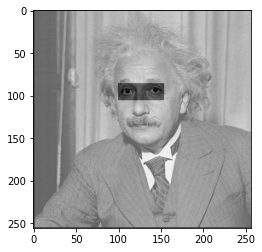

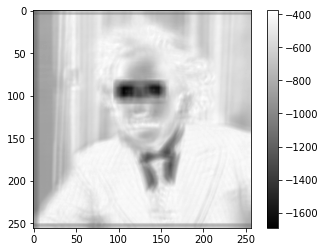

In [9]:
# However, it has a serious drawback when there are photometric changes 
# between the template and the image, as shown here.

image_modf = image.copy()
image_modf[86:106,100:154] = image_modf[86:106,100:154] - np.mean(image_modf[86:106,100:154])

plt.imshow(image_modf, cmap='gray')
plt.show()

# We filter again with SSD
h = ssd_filter(image_modf, template)

plt.imshow(1 - np.sqrt(h), cmap='gray')
# plt.imshow(h, cmap='gray')
plt.colorbar()
plt.show()

# figure(8),imagesx(fModf),colormap gray, axis image

# % Se filtra nuevamente con SSD

# h1 = sum(g(:).^2)*ones(size(fModf));
# h2 = -2*filter2(g,fModf,'same');
# h3 = filter2(ones(size(g)),fModf.^2,'same');
# h = h1 + h2 + h3;
# figure(9); imagesc(1-sqrt(h)),colormap gray, axis image, title('1-sqrt(SSD)')

# h_bw = h<min(h(:))+1;
# figure(10); imagesc(h_bw),colormap gray, axis image, title('Thresholded Image')

# % ?Problemas?

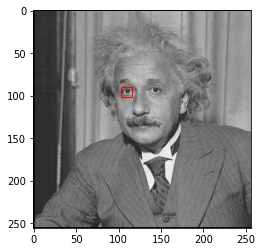

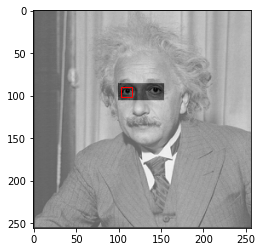

In [10]:
# TODO

# Use the function match_template to locate the template in image and image_modf
# as shown below


from skimage.feature import match_template

# compute correlation

# find x,y coordinates

# display image

# draw rectangle

# show


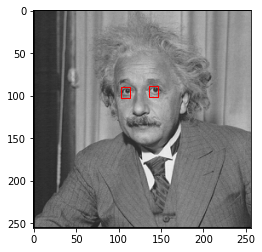

In [ ]:
# Bonus
# Use peak_local_max to detect a second lower peak in the second eye

# Tips: you need to select and appropriate threshold

from skimage.feature import peak_local_max
